# *Getting Started with pandas:*
#  Part 3) Summarizing and Computing Descriptive Statistics

pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of *reductions* or *summary* statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data. Consider a small DataFrame:

In [1]:
import pandas as pd
import numpy as np

# Table of Content

- 3.1  **[Descriptive and Summary statistics](#descriptive)**
- 3.2  **[Correlation and Covariance](#Correlation)**
- 3.3  **[Unique Values, Value Counts, and Membership](#Unique)**

<a id="descriptive"></a>
## 3.1 Descriptive and summary statistics

In [2]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [3]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Calling DataFrame’s `sum` method returns a Series containing column sums:

In [4]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passing `axis='columns'` or `axis=1` sums across the columns instead:

In [5]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA. This can be disabled with the `skipna` option:

In [6]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [7]:
df.mean(axis='columns')

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

See Table 5-7 for a list of common options for each reduction method.

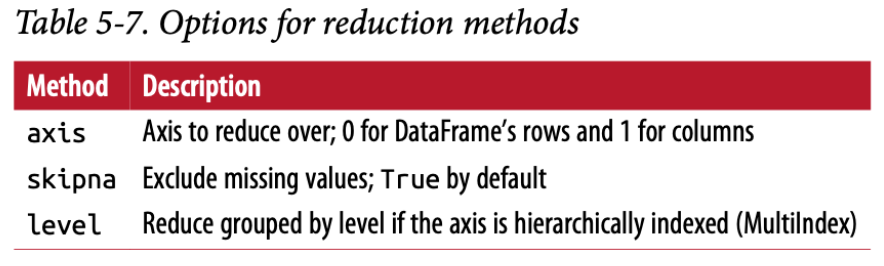


Some methods, like `idxmin` and `idxmax`, return indirect statistics like the index value where the minimum or maximum values are attained:

In [10]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [17]:
df.idxmax(axis='columns')

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_82999/109167834.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df.idxmax(axis='columns')


a    one
b    one
c    NaN
d    one
dtype: object

Other methods are *accumulations*:

In [13]:
df.cumsum()

#Pandas dataframe.cumsum() is used to find the cumulative sum value over any axis. 
#Each cell is populated with the cumulative sum of the values seen so far.

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [14]:
df.cumsum(axis='columns')

,one,two
a,1.40,NaN
b,7.10,2.60
c,NaN,NaN
d,0.75,-0.55



Another type of method is neither a reduction nor an accumulation. `describe` is one such example, producing multiple summary statistics in one shot:

In [15]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, `describe` produces alternative summary statistics:

In [18]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [19]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [20]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

See Table 5-8 for a full list of summary statistics and related methods.

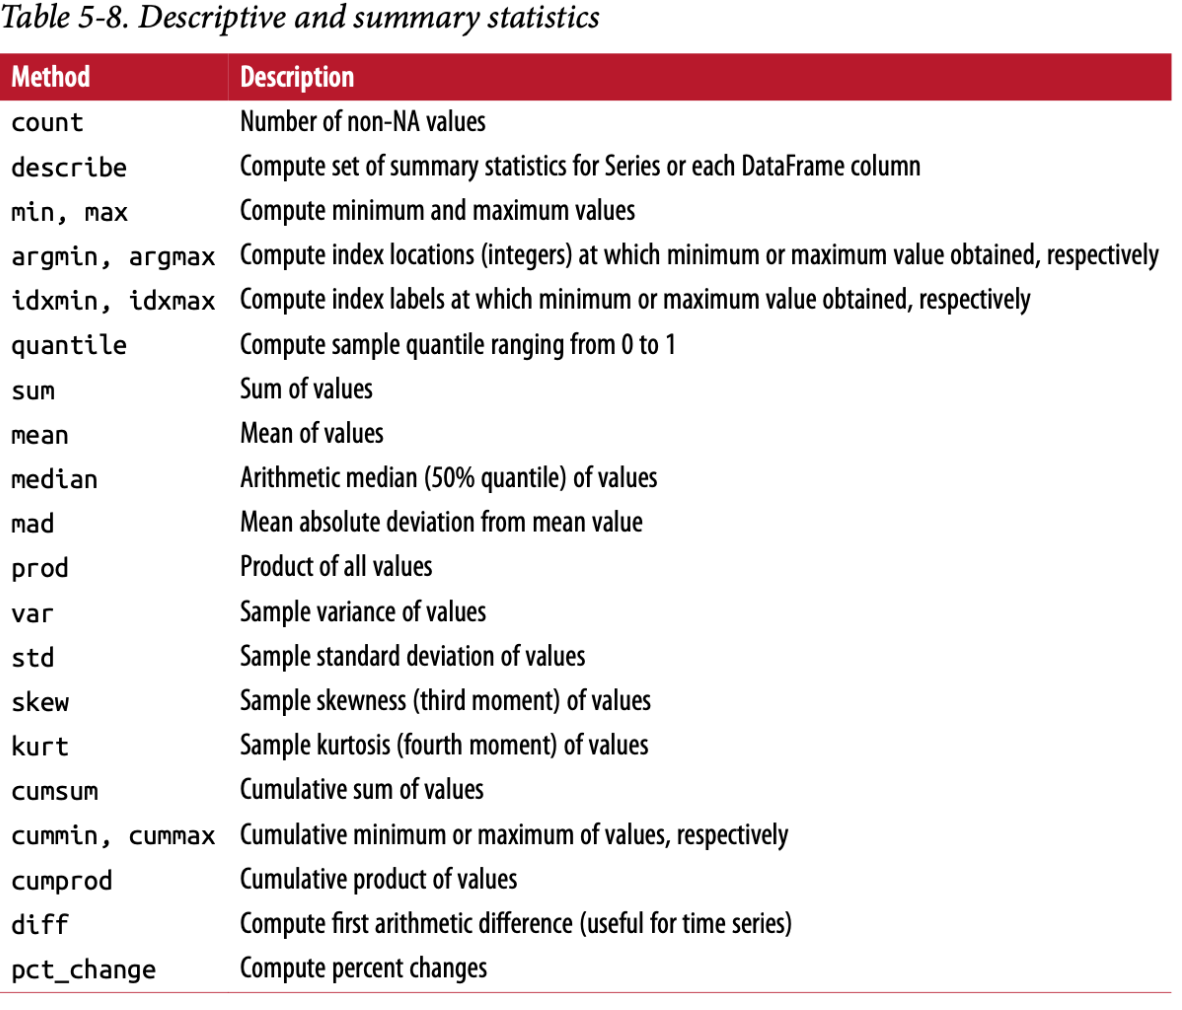

<a id="Correlation"></a>
## 3.2 Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on `pandas-datareader` package. If you don’t have it installed already, it can be obtained via conda or pip:

In [23]:
# !pip install pandas-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.1 MB/s eta 0:00:00a 0:00:01


I use the `pandas_datareader` module to download some data for a few stock tickers:

In [26]:
import pandas_datareader.data as web
! pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for peewee: filename=peewee-3.17.8-cp313-cp313-macosx_11_0_arm64.whl size=265793 sha256=5d6d0da6e38fe3068f434fad1944d641aa874d616dcedf3e05952f00b641f182
  Stored in directory: /Users/nkohei/Library/Caches/pip/wheels/b2/69/9e/5485afcc187c66def1fab96de510fa77da574ec5343f3a5f89
Successfully built peewee


In [27]:
import yfinance as yf

all_data = {ticker: yf.download(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
# Create a dictionary with only the 'Adj Close' column from each DataFrame in all_data
price_data = {ticker: data['Adj Close'] for ticker, data in all_data.items() if 'Adj Close' in data.columns}

# Convert the dictionary to a DataFrame
price = pd.DataFrame(price_data)


ValueError: If using all scalar values, you must pass an index

In [36]:
dict_ = {}

for ticker, data in all_data.items():
    print(ticker, data['Adj Close'])
    dict_ = {ticker:data['Adj Close']}



AAPL Ticker                           AAPL
Date                                 
1980-12-12 00:00:00+00:00    0.098834
1980-12-15 00:00:00+00:00    0.093678
1980-12-16 00:00:00+00:00    0.086802
1980-12-17 00:00:00+00:00    0.088951
1980-12-18 00:00:00+00:00    0.091530
...                               ...
2024-11-08 00:00:00+00:00  226.960007
2024-11-11 00:00:00+00:00  224.229996
2024-11-12 00:00:00+00:00  224.229996
2024-11-13 00:00:00+00:00  225.119995
2024-11-14 00:00:00+00:00  228.220001

[11074 rows x 1 columns]
IBM Ticker                            IBM
Date                                 
1962-01-02 00:00:00+00:00    1.501487
1962-01-03 00:00:00+00:00    1.514612
1962-01-04 00:00:00+00:00    1.499518
1962-01-05 00:00:00+00:00    1.469989
1962-01-08 00:00:00+00:00    1.442426
...                               ...
2024-11-08 00:00:00+00:00  212.048828
2024-11-11 00:00:00+00:00  211.900009
2024-11-12 00:00:00+00:00  210.860001
2024-11-13 00:00:00+00:00  210.919998
2024-11-14 00:0

dict_keys(['GOOG'])

In [39]:
all_data.column()

AttributeError: 'dict' object has no attribute 'column'

In [45]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-25,35.720448,109.942146,68.838737,46.048500
2017-09-26,36.334961,110.462219,68.838737,46.243000
2017-09-27,36.593582,109.783897,69.393112,47.224499
2017-09-28,36.368183,109.783897,69.411926,47.474998
2017-09-29,36.567474,109.346741,69.994507,47.955502


In [40]:
volume = pd.DataFrame({ticker: data['Volume']
         for ticker, data in all_data.items()})

In [46]:
volume.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-25,177549200.0,5452903.0,24149200.0,37136000.0
2017-09-26,146640000.0,4695076.0,18019600.0,33338000.0
2017-09-27,102016800.0,3663824.0,19565100.0,44788000.0
2017-09-28,88022000.0,2902441.0,10883800.0,20406000.0
2017-09-29,105199200.0,2776816.0,17079100.0,31620000.0


I now compute percent changes of the prices

In [42]:
returns = price.pct_change()

#The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, 
# by default, the previous row. Which row to compare with can be specified with the periods parameter.

#Pandas’ pct_change() function is extremely handy for comparing the percentage of change in a time series data.
#By default, pct_change() function computes using rows.

In [47]:
returns.head()

#0.017203 = (36.334961 - 35.720448)/35.720448
#The first row contains NaN values, as there is no previous row from which we can calculate the change.

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-25,NaN,NaN,NaN,NaN
2017-09-26,0.017203,0.004730,0.000000,0.004224
2017-09-27,0.007118,-0.006141,0.008053,0.021225
2017-09-28,-0.006160,0.000000,0.000271,0.005304
2017-09-29,0.005480,-0.003982,0.008393,0.010121


The `corr` method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series. Relatedly, `cov` computes the covariance:

In [49]:
returns['MSFT'].corr(returns['IBM']) 

0.4824808988886506

In [51]:
price['MSFT'].corr(price['IBM']) 

0.49975010422094585

In [50]:
returns['MSFT'].cov(returns['IBM']) 

0.0001567477245899717

Since `MSFT` is a valid Python attribute, we can also select these columns using more concise syntax:

In [53]:
returns.MSFT.corr(returns.IBM)

0.4824808988886506

DataFrame’s `corr` and `cov` methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [54]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.441064,0.762274,0.688801
IBM,0.441064,1.000000,0.482481,0.449693
MSFT,0.762274,0.482481,1.000000,0.790873
GOOG,0.688801,0.449693,0.790873,1.000000


In [55]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000417,0.000155,0.000293,0.000266
IBM,0.000155,0.000297,0.000157,0.000147
MSFT,0.000293,0.000157,0.000356,0.000283
GOOG,0.000266,0.000147,0.000283,0.000359


Using DataFrame’s `corrwith` method, you can compute pairwise correlations between a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series returns a Series with the correlation value computed for each column:

In [56]:
returns.corrwith(returns.IBM)

AAPL    0.441064
IBM     1.000000
MSFT    0.482481
GOOG    0.449693
dtype: float64

Passing a DataFrame computes the correlations of matching column names. Here I compute correlations of percent changes with volume:


In [57]:
returns.corrwith(volume)

AAPL   -0.075319
IBM    -0.110115
MSFT   -0.067917
GOOG   -0.077727
dtype: float64

Passing `axis='columns'` does things row-by-row instead. In all cases, the data points are aligned by label before the correlation is computed.

<a id="Unique"></a>
## 3.3 Unique Values, Value Counts, and Membership

Another class of related methods extracts information about the values contained in a one-dimensional Series. To illustrate these, consider this example:

In [58]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [59]:
obj 

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

The first function is `unique`, which gives you an array of the unique values in a Series:

In [60]:
uniques = obj.unique()

In [61]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order, but could be sorted after the fact if needed (`uniques.sort()`). Relatedly, `value_counts` computes a Series containing value frequencies:

In [65]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

The Series is sorted by value in descending order as a convenience. `value_counts` is also available as a top-level pandas method that can be used with any array or sequence

In [64]:
pd.value_counts(obj.values, sort=False) 

b    2
d    1
a    3
c    3
dtype: int64

In [66]:
pd.value_counts(obj.values, sort=True) 

a    3
c    3
b    2
d    1
dtype: int64

`isin` performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [43]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [44]:
mask = obj.isin(['b', 'c'])

In [45]:
mask

0     False
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10     True
11     True
12    False
13    False
14     True
15     True
dtype: bool

In [46]:
obj[mask]

2     b
3     c
6     b
7     c
10    b
11    c
14    b
15    c
dtype: object

Related to `isin` is the `Index.get_indexer` method, which gives you an index array from an array of possibly non-distinct values into another array of distinct values:

In [48]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [49]:
to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [50]:
unique_vals = pd.Series(['c', 'b', 'a'])


In [51]:
unique_vals

0    c
1    b
2    a
dtype: object

In [53]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

See Table 5-9 for a reference on these methods.

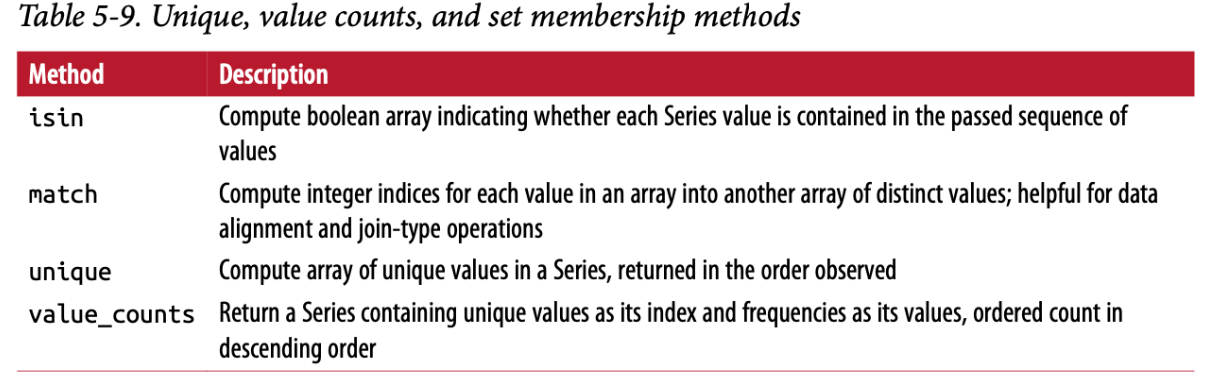

In some cases, you may want to compute a histogram on multiple related columns in a DataFrame. Here’s an example:

In [56]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2, 3, 1, 2, 3],
                    'Qu3': [1, 5, 2, 4, 4]})

In [57]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


Passing `pandas.value_counts` to this DataFrame’s `apply` function gives:

In [58]:
result = data.apply(pd.value_counts).fillna(0)

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_82999/2451317050.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = data.apply(pd.value_counts).fillna(0)


In [59]:
result

#Here, the row labels in the result are the distinct values occurring in all of the columns. 
#The values are the respective counts of these values in each column.

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In the next lecture, we’ll discuss tools for reading (or loading) and writing datasets with pandas. After that, we’ll dig deeper into data cleaning, wrangling, analysis, and visualization tools using pandas.